## Make plots that show the expression of gene X
Author: Juliska E Boer (18112020)

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.sparse import csr_matrix

#settings
sc.settings.verbosity = 3
sc.logging.print_versions()
scv.logging.print_versions()
sc.settings.figdir = "../../../figures/DevelopmentalHb/"
scv.settings.figdir = "../../../figures/DevelopmentalHb/"
sc.settings.set_figure_params(dpi=80)

C:\Users\Juliska\Anaconda3\envs\UMCU\lib\site-packages\anndata\_core\anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


scanpy==1.4.6 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==1.0.1 scikit-learn==0.22.1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1
scvelo==0.1.25  scanpy==1.4.6  anndata==0.7.1  loompy==2.0.17  numpy==1.18.1  scipy==1.4.1  matplotlib==3.2.1  sklearn==0.22.1  pandas==1.0.1  

In [2]:
c_cont_red = mpl.colors.LinearSegmentedColormap.from_list('custom_red', 
                                             [(0, 'silver'),
                                              (0.1, (1, 0.82, 0.82)),
                                              (0.2, (1, 0.67, 0.67)),
                                              (0.3, (1, 0.58, 0.58)),
                                              (0.4, (1, 0.48, 0.48)),
                                              (0.5, (1, 0.38, 0.38)),
                                              (0.6, (1, 0.29, 0.29)),
                                              (0.7, (1, 0.22, 0.22)),
                                              (0.8, (1, 0.15, 0.15)),
                                              (0.9, (0.67, 0.09, 0.09)),
                                              (1, (0.54, 0, 0))], N=128)
c_cont_green = mpl.colors.LinearSegmentedColormap.from_list('custom_green', 
                                             [(0, 'silver'),
                                              (0.1, (0.50, 0.93, 0.60)),
                                              (0.2, (0.4, 0.89, 0.5)),
                                              (0.3, (0.3, 0.81, 0.4)),
                                              (0.4, (0.2, 0.73, 0.3)),
                                              (0.5, (0.1, 0.69, 0.2)),
                                              (0.6, (0, 0.62, 0.185)),
                                              (0.7, (0, 0.55, 0.16)),
                                              (0.8, (0, 0.47, 0.15)),
                                              (0.9, (0, 0.36, 0.11)),
                                              (1, (0, 0.29, 0.06))], N=128)
c_cont_blue = mpl.colors.LinearSegmentedColormap.from_list('custom_blue', 
                                             [(0, 'silver'),
                                              (0.1, (0.67, 0.77, 1)),
                                              (0.2, (0.58, 0.68, 1)),
                                              (0.3, (0.48, 0.58, 1)),
                                              (0.4, (0.38, 0.48, 1)),
                                              (0.5, (0.29, 0.39, 1)),
                                              (0.6, (0.22, 0.32, 1)),
                                              (0.7, (0.15, 0.25, 1)),
                                              (0.8, (0.09, 0.19, 1)),
                                              (0.9, (0, 0.1, 0.75)),
                                              (1, (0, 0.1, 0.5))], N=128)

In [3]:
adata = sc.read_h5ad('../../../data/output/DevelopmentalHb/Mar2020_embryo_Hb_Pou4f1_PAGA_seurat.h5ad')
#Mar2020_embryo_Hb_Pou4f1_louvain_seurat

In [4]:
# Alter this only, then the plots will change as well.
gene_name = "Cntn2"

Text(0.5, 1.0, 'Cntn2')

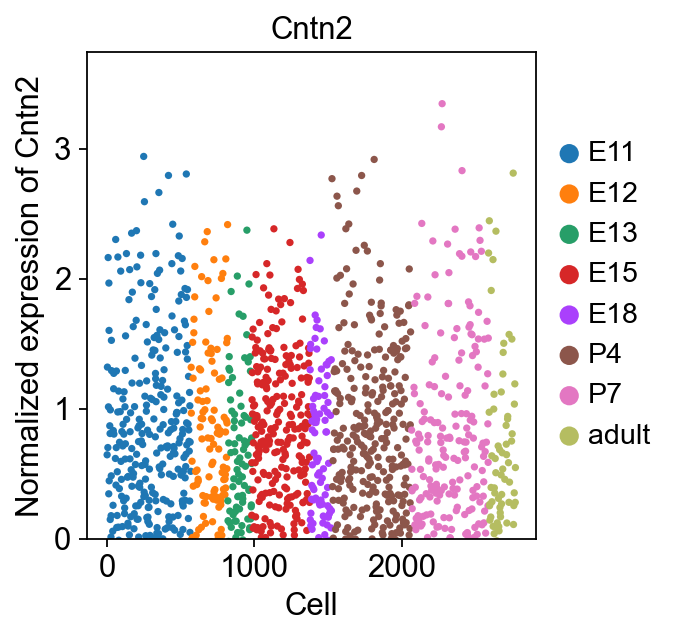

In [5]:
adata.obs[gene_name + "_norm_expr"] = adata[:, gene_name].X ## normalized expression of x for each cell
adata.obs["cellnr"] = np.arange(1, len(adata.obs)+1) ## give each cell a number (1 --> #cells)

axes = sc.pl.scatter(adata, x="cellnr", y=(gene_name + "_norm_expr"), color="stage", show=False)
axes.set_ylim(bottom=0)
axes.set_ylabel("Normalized expression of " + gene_name)
axes.set_xlabel("Cell")
plt.grid(b=None)
axes.set_title(gene_name)

In [6]:
# put the normalized expression of gene x of each cell per timepoint in a dataframe 
df_final_c = pd.DataFrame()
for x in set(adata.obs["stage"]):
    df = pd.DataFrame()
    temp = adata[adata.obs["stage"] == x]
    res = temp.obs_vector(gene_name + "_norm_expr")
    df[x] = res
    # concatenate all the dataframes per timepoint together to one huge dataframe
    df_final_c = pd.concat([df_final_c, df], ignore_index=False, axis=1)
df_final_c = df_final_c[["E11", "E12", "E13", "E15", "E18", "P4", "P7", "adult"]]

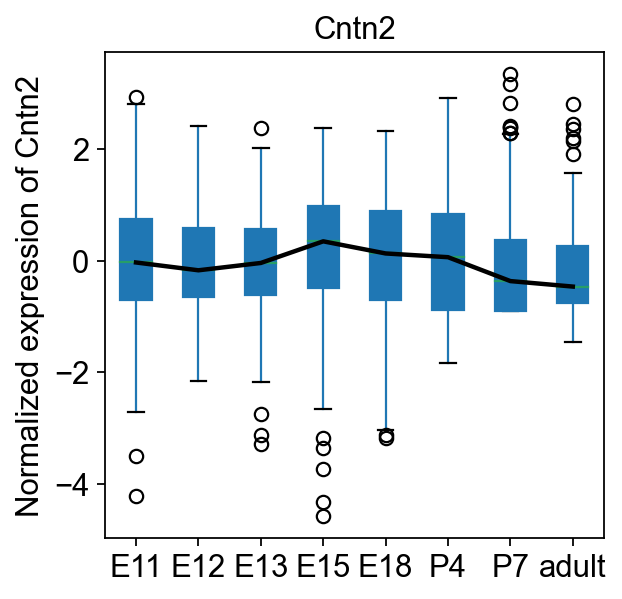

In [7]:
df_final_c.boxplot(patch_artist=True)
plt.plot([1, 2, 3, 4, 5, 6, 7, 8], df_final_c.median(axis=0), lw=2, color="black", zorder=5)
plt.ylabel("Normalized expression of " + gene_name)
plt.title(gene_name)
plt.grid(b=None)
plt.show()

In [8]:
df = pd.DataFrame()
for x in set(adata.obs["stage"]):
    temp = adata[adata.obs["stage"] == x]
    all_cells = temp.shape[0]
    positive = temp[temp.obs_vector(gene_name + "_norm_expr") > 0.0].shape[0] #determine amount of cells that are x positive
    perc_pos = (positive/(all_cells))*100 #determine total amount of cells
    df[x] = [perc_pos]
df = df[["E11", "E12", "E13", "E15", "E18", "P4", "P7", "adult"]]

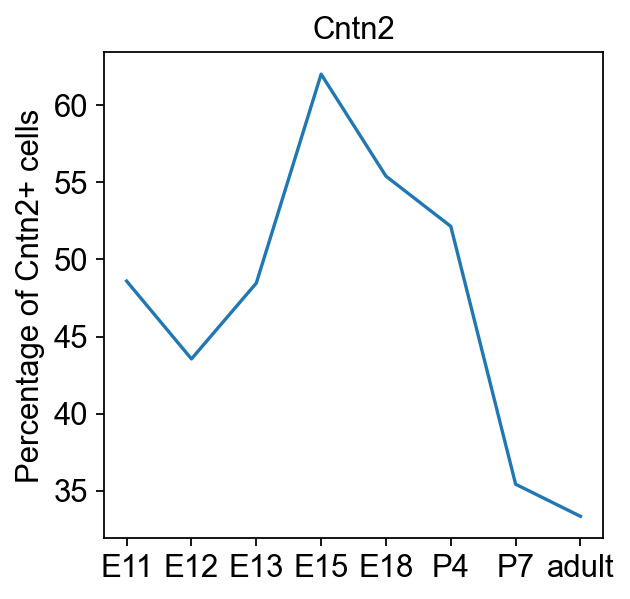

In [9]:
plt.plot(df.loc[0])
plt.ylabel("Percentage of " + gene_name + "+ cells")
plt.title(gene_name)
plt.grid(b=None)
plt.show()